In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

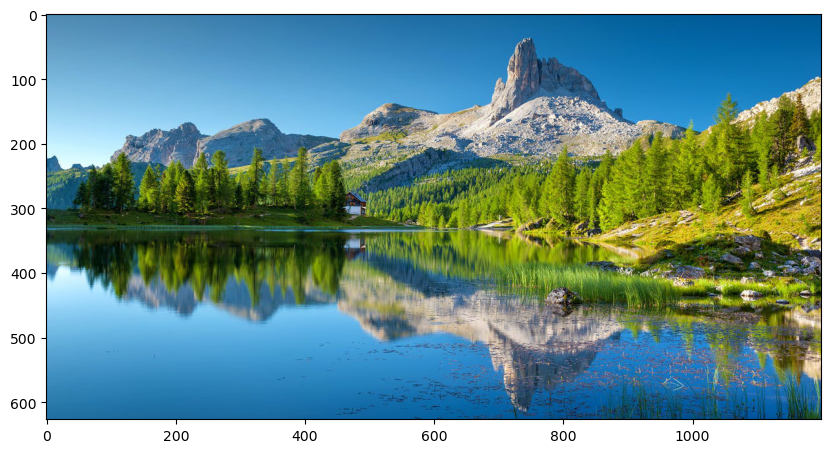

In [2]:
# Import matplotlib image
import matplotlib.image as img
# Import a random image
pic = img.imread("Image.jpeg");

# Check whether Image is loaded
plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.show()

In [3]:
# Checck shape

pic.shape

(627, 1200, 3)

# K-Means Clustering

In [4]:
import cv2

In [5]:
# Read Image using cv2

pic = cv2.imread("Image.jpeg");

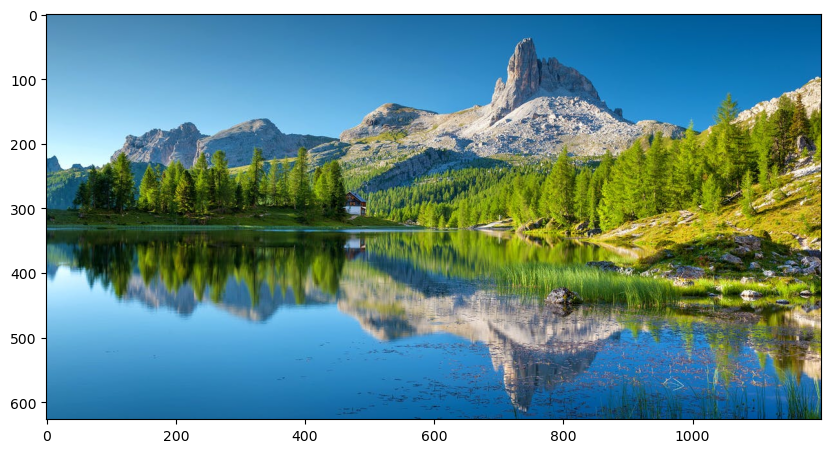

In [10]:
# Change color to RGB (from BGR)
plt.figure(figsize=(10,10))
image = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [11]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

In [12]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals_fl = np.float32(pixel_vals)

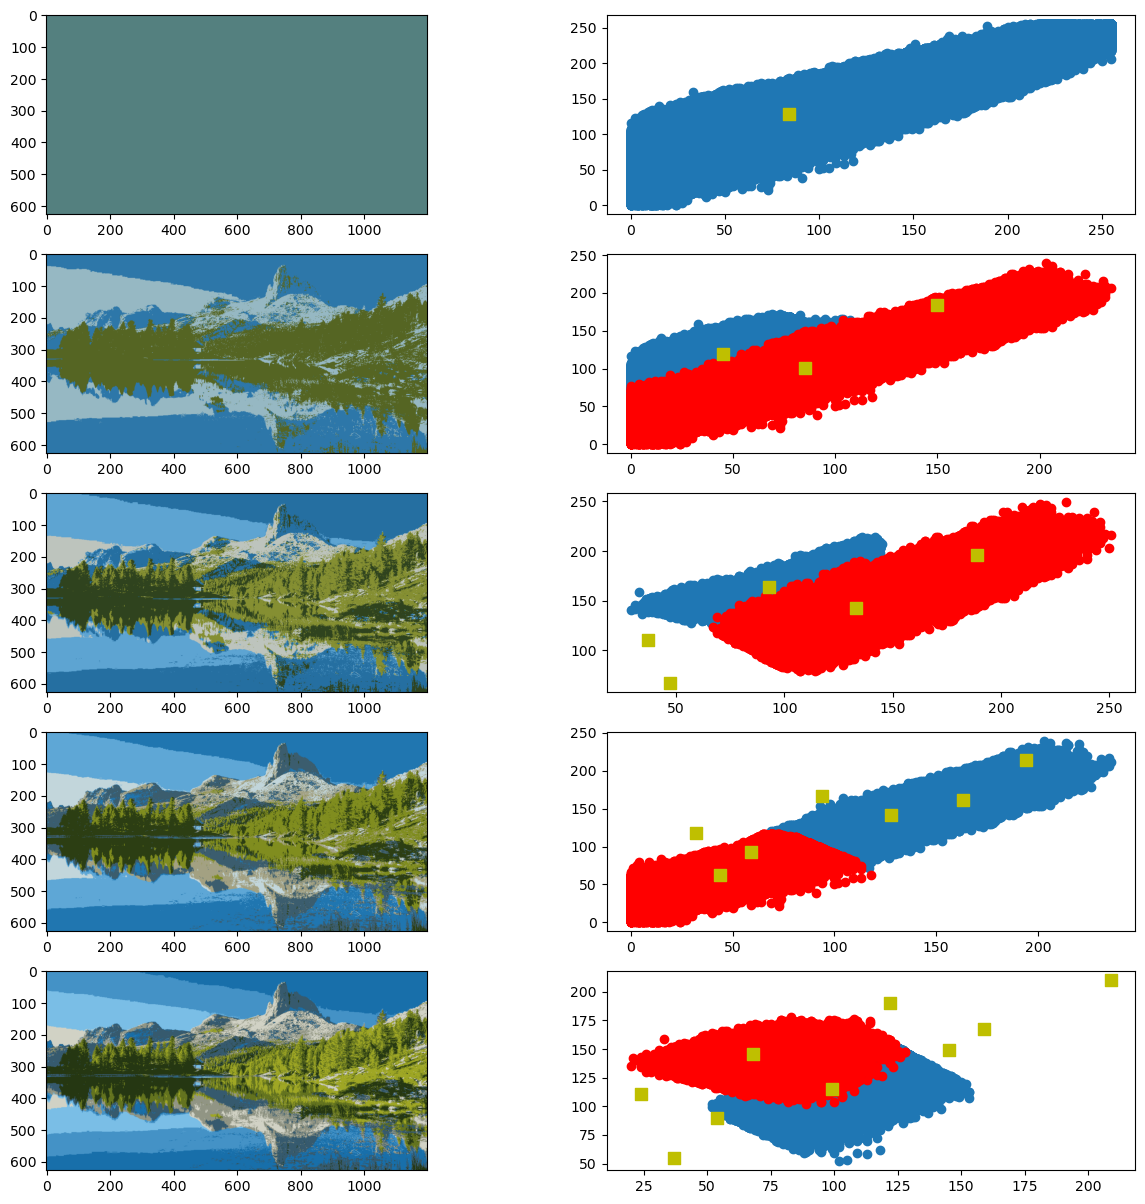

In [13]:
plt.figure(figsize=(15,15))
i=1
for k in range(1,10,2):
    retval, labels, centers = cv2.kmeans(pixel_vals_fl, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
 
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    plt.subplot(5,2,i)
    plt.imshow(segmented_image)
    i = i+1
    # Now separate the data, Note the flatten()
    A = pixel_vals[labels.ravel()==0]
    B = pixel_vals[labels.ravel()==1]
    # Plot the data
    plt.subplot(5,2,i)
    plt.scatter(A[:,0],A[:,1])
    plt.scatter(B[:,0],B[:,1],c = 'r')
    plt.scatter(centers[:,0],centers[:,1],s = 80,c = 'y', marker = 's')
    i = i+1

# Agglomerative Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0)

In [16]:
scale_percent = 5 # percent of original size
width = int(pic.shape[1] * scale_percent / 100)
height = int(pic.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(pic, dim, interpolation = cv2.INTER_AREA)
resized.shape

(31, 60, 3)

In [17]:
X = resized.flatten().reshape(-1,1)
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [18]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

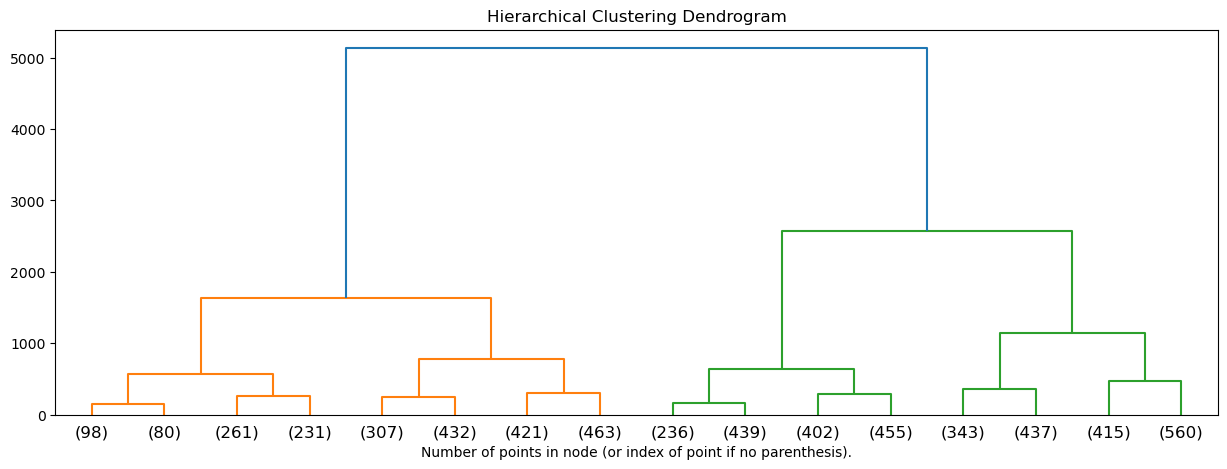

In [19]:
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()